In [12]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])

cm = plt.get_cmap('Set1') 
colors = cm.colors

In [18]:
# Load Data
root = "/Users/sxk199/PhD/code/humans-contrastiveXAI/data/rationales-biosbias"
lrp = pd.read_csv(f"{root}/analysis_pos_lrp.csv", converters={"top5POS": ast.literal_eval})
gi = pd.read_csv(f"{root}/analysis_pos_gi.csv", converters={"top5POS": ast.literal_eval})
gradnorm = pd.read_csv(f"{root}/analysis_pos_gi_norm.csv", converters={"top5POS": ast.literal_eval})

lrp

,xai,model,contrastive,class,words,top5POS
0,lrp,gpt2-small,False,nurse,"['honors', 'diverse', 'NURSE', 'graduated', '.']","[NOUN, ADJ, PROPN, VERB, PUNCT]"
1,lrp,gpt2-small,False,nurse,"['part', 'her', 'her', 'based', 'Nursing']","[NOUN, PRON, PRON, VERB, PROPN]"
2,lrp,gpt2-small,False,nurse,"['.', 'nurse', 'Pamela', 'Medical', 'She']","[PUNCT, NOUN, PROPN, PROPN, PRON]"
3,lrp,gpt2-small,False,psychologist,"['working', 'Consultation', 'Autism', 'Behavio...","[VERB, PROPN, PROPN, PROPN, PROPN]"
4,lrp,gpt2-small,False,dentist,"['BDS', 'Delhi', 'Dental', 'Dental', 'Dr.']","[PROPN, PROPN, PROPN, PROPN, PROPN]"
...,...,...,...,...,...,...
26059,lrp,t5-large,True,surgeon,"['Oncology', 'practice', 'Dr.', 'graduated', '...","[PROPN, NOUN, PROPN, VERB, PROPN]"
26060,lrp,t5-large,True,dentist,"['Association', 'Dental', 'Dental', 'Dental', ...","[PROPN, PROPN, PROPN, PROPN, ADJ]"
26061,lrp,t5-large,True,dentist,"['practising', 'Dr.', 'appointment', 'Clinic',...","[VERB, PROPN, NOUN, PROPN, PROPN]"
26062,lrp,t5-large,True,dentist,"['.', 'health', 'dentistry', 'oral', 'smile']","[PUNCT, NOUN, NOUN, ADJ, NOUN]"


In [19]:
print("non-contrastive")
print("LRP")
post = [tag for instance in lrp.loc[lrp.contrastive == False]['top5POS'].values for tag in instance]
print(Counter(post).most_common(5))
print("GI")
post = [tag for instance in gi.loc[gi.contrastive == False]['top5POS'].values for tag in instance]
print(Counter(post).most_common(5))
print("GradNorm")
post = [tag for instance in gradnorm.loc[gradnorm.contrastive == False]['top5POS'].values for tag in instance]
print(Counter(post).most_common(5))

non-contrastive
LRP
[('PROPN', 25639), ('NOUN', 19843), ('ADJ', 6439), ('PRON', 4081), ('VERB', 4070)]
GI
[('PROPN', 25178), ('NOUN', 15564), ('ADJ', 4631), ('VERB', 4617), ('PUNCT', 4489)]
GradNorm
[('PROPN', 27092), ('NOUN', 17106), ('ADJ', 6187), ('PUNCT', 5310), ('VERB', 2820)]


In [17]:
print("contrastive")
print("LRP")
post = [tag for instance in lrp.loc[lrp.contrastive == True]['top5POS'].values for tag in instance]
print(Counter(post).most_common(5))
print("GI")
post = [tag for instance in gi.loc[gi.contrastive == True]['top5POS'].values for tag in instance]
print(Counter(post).most_common(5))
print("GradNorm")
post = [tag for instance in gradnorm.loc[gradnorm.contrastive == True]['top5POS'].values for tag in instance]
print(Counter(post).most_common(5))

contrastive
LRP
[('PROPN', 24638), ('NOUN', 20857), ('ADJ', 6542), ('VERB', 4408), ('PRON', 3127)]
GI
[('PROPN', 24689), ('NOUN', 16033), ('ADJ', 4744), ('VERB', 4622), ('PUNCT', 3986)]
GradNorm
[('PROPN', 28587), ('NOUN', 18231), ('ADJ', 6580), ('PUNCT', 3413), ('VERB', 2709)]


In [20]:
# BIOSBIAS , LRP

results = {
    "humans": {
        "non-contrastive": [('NOUN', 41.05), ('PROPN', 27.71), ('ADJ', 14.82), ('PUNCT', 5.13), ('CCONJ', 3.99)],
        "contrastive": [('NOUN', 44.03), ('PROPN', 25.58), ('ADJ', 15.93), ('CCONJ', 4.4), ('PUNCT', 3.77)]
    },
    "gpt2-small-biosbias": {
        "non-contrastive": [('NOUN', 24.01), ('PROPN', 20.06), ('PUNCT', 10.17), ('ADP', 9.6), ('VERB', 8.19)],
        "contrastive": [('NOUN', 24.32), ('PROPN', 20.74), ('PUNCT', 10.3), ('ADP', 9.59), ('VERB', 7.73)]
    },
    "gpt2-base-biosbias": {
        "non-contrastive": [('NOUN', 26.46), ('PROPN', 18.35), ('PUNCT', 9.53), ('ADP', 8.96), ('VERB', 8.11)],
        "contrastive": [('NOUN', 26.69), ('PROPN', 19.35), ('PUNCT', 9.53), ('ADP', 9.53), ('VERB', 8.94)]
    },
    "gpt2-large-biosbias": {
        "non-contrastive": [('NOUN', 25.28), ('PROPN', 19.65), ('ADP', 11.39), ('PUNCT', 8.89), ('VERB', 8.39)],
        "contrastive": [('NOUN', 26.33), ('PROPN', 19.49), ('ADP', 10.51), ('VERB', 9.11), ('PUNCT', 8.73)]
    },
    "roberta-small-biosbias": {
        "non-contrastive": [('NOUN', 21.61), ('PROPN', 18.1), ('PUNCT', 13.72), ('ADP', 12.55), ('VERB', 6.72)],
        "contrastive": [('NOUN', 22.58), ('PROPN', 18.67), ('PUNCT', 14.62), ('ADP', 11.72), ('VERB', 6.8)]
    },
    "roberta-base-biosbias": {
        "non-contrastive": [('NOUN', 20.11), ('PROPN', 18.5), ('ADP', 12.87), ('PUNCT', 12.6), ('VERB', 7.77)],
        "contrastive": [('NOUN', 19.81), ('PROPN', 19.14), ('ADP', 13.61), ('PUNCT', 12.26), ('VERB', 7.14)]
    },
    "roberta-large-biosbias": {
        "non-contrastive": [('NOUN', 21.42), ('PROPN', 16.82), ('ADP', 14.85), ('PUNCT', 13.53), ('VERB', 8.02)],
        "contrastive": [('NOUN', 21.78), ('PROPN', 17.59), ('ADP', 14.83), ('PUNCT', 12.73), ('VERB', 8.27)]
    },
    "t5-small-biosbias": {
        "non-contrastive": [('NOUN', 21.95), ('PROPN', 20.3), ('PUNCT', 12.89), ('ADP', 10.7), ('VERB', 7.82)],
        "contrastive": [('NOUN', 22.37), ('PROPN', 19.24), ('PUNCT', 13.92), ('ADP', 11.19), ('VERB', 7.37)]
    },
    "t5-base-biosbias": {
        "non-contrastive": [('NOUN', 21.72), ('PROPN', 20.17), ('PUNCT', 13.4), ('ADP', 10.44), ('ADJ', 7.19)],
        "contrastive": [('NOUN', 21.53), ('PROPN', 19.94), ('PUNCT', 14.02), ('ADP', 11.71), ('ADJ', 7.51)]
    },
    "t5-large-biosbias": {
        "non-contrastive": [('PROPN', 20.92), ('NOUN', 18.76), ('PUNCT', 14.04), ('ADP', 10.8), ('VERB', 7.69)],
        "contrastive": [('PROPN', 20.26), ('NOUN', 18.36), ('PUNCT', 13.95), ('ADP', 10.13), ('VERB', 8.52)]
    }
}
df = pd.DataFrame(data=results).T
df['model'] = df.index
df

,non-contrastive,contrastive,model
humans,"[(NOUN, 41.05), (PROPN, 27.71), (ADJ, 14.82), ...","[(NOUN, 44.03), (PROPN, 25.58), (ADJ, 15.93), ...",humans
gpt2-small-biosbias,"[(NOUN, 24.01), (PROPN, 20.06), (PUNCT, 10.17)...","[(NOUN, 24.32), (PROPN, 20.74), (PUNCT, 10.3),...",gpt2-small-biosbias
gpt2-base-biosbias,"[(NOUN, 26.46), (PROPN, 18.35), (PUNCT, 9.53),...","[(NOUN, 26.69), (PROPN, 19.35), (PUNCT, 9.53),...",gpt2-base-biosbias
gpt2-large-biosbias,"[(NOUN, 25.28), (PROPN, 19.65), (ADP, 11.39), ...","[(NOUN, 26.33), (PROPN, 19.49), (ADP, 10.51), ...",gpt2-large-biosbias
roberta-small-biosbias,"[(NOUN, 21.61), (PROPN, 18.1), (PUNCT, 13.72),...","[(NOUN, 22.58), (PROPN, 18.67), (PUNCT, 14.62)...",roberta-small-biosbias
roberta-base-biosbias,"[(NOUN, 20.11), (PROPN, 18.5), (ADP, 12.87), (...","[(NOUN, 19.81), (PROPN, 19.14), (ADP, 13.61), ...",roberta-base-biosbias
roberta-large-biosbias,"[(NOUN, 21.42), (PROPN, 16.82), (ADP, 14.85), ...","[(NOUN, 21.78), (PROPN, 17.59), (ADP, 14.83), ...",roberta-large-biosbias
t5-small-biosbias,"[(NOUN, 21.95), (PROPN, 20.3), (PUNCT, 12.89),...","[(NOUN, 22.37), (PROPN, 19.24), (PUNCT, 13.92)...",t5-small-biosbias
t5-base-biosbias,"[(NOUN, 21.72), (PROPN, 20.17), (PUNCT, 13.4),...","[(NOUN, 21.53), (PROPN, 19.94), (PUNCT, 14.02)...",t5-base-biosbias
t5-large-biosbias,"[(PROPN, 20.92), (NOUN, 18.76), (PUNCT, 14.04)...","[(PROPN, 20.26), (NOUN, 18.36), (PUNCT, 13.95)...",t5-large-biosbias


In [26]:
y_standard = df["non-contrastive"]
y_standard

humans                    [(NOUN, 41.05), (PROPN, 27.71), (ADJ, 14.82), ...
gpt2-small-biosbias       [(NOUN, 24.01), (PROPN, 20.06), (PUNCT, 10.17)...
gpt2-base-biosbias        [(NOUN, 26.46), (PROPN, 18.35), (PUNCT, 9.53),...
gpt2-large-biosbias       [(NOUN, 25.28), (PROPN, 19.65), (ADP, 11.39), ...
roberta-small-biosbias    [(NOUN, 21.61), (PROPN, 18.1), (PUNCT, 13.72),...
roberta-base-biosbias     [(NOUN, 20.11), (PROPN, 18.5), (ADP, 12.87), (...
roberta-large-biosbias    [(NOUN, 21.42), (PROPN, 16.82), (ADP, 14.85), ...
t5-small-biosbias         [(NOUN, 21.95), (PROPN, 20.3), (PUNCT, 12.89),...
t5-base-biosbias          [(NOUN, 21.72), (PROPN, 20.17), (PUNCT, 13.4),...
t5-large-biosbias         [(PROPN, 20.92), (NOUN, 18.76), (PUNCT, 14.04)...
Name: non-contrastive, dtype: object

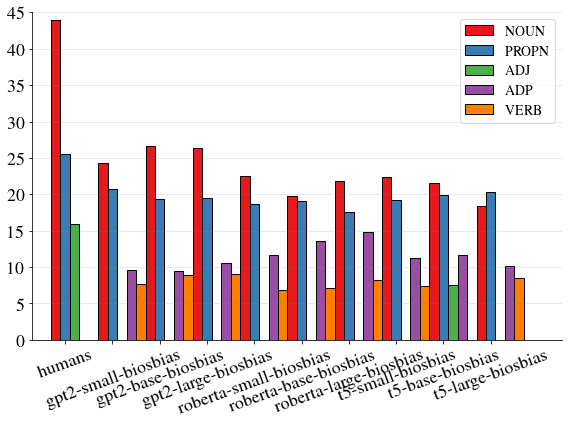

In [46]:
# NON-CONTRASTIVE 
f, ax0 = plt.subplots(figsize=(8,6), tight_layout=True)

bar_width = 2./len(results)
ax0.set_xlim(-0.5, 10.5+bar_width) 

X = np.array(range(len(results)))
ax0.set_xticks([idx+bar_width for idx in X])
ax0.set_xticklabels(list(results.keys()), fontsize=18, rotation=20)

row_names = ["NOUN", "PROPN", "ADJ", "ADP", "VERB"]
plot_dict = {name: colors[i] for i,name in enumerate(row_names)}



for i, name in enumerate(row_names):
    ys = []
    for modelname in list(results.keys()):
        y_standard = df.loc[modelname, "contrastive"]
#         y_contrastive = df.loc[modelname, "contrastive"]
        score = [v[1] for v in y_standard if v[0] == name]
        if not score:
            score = [0.0]
        ys.extend(score)
    
    label=None
    ax0.bar(X + i*bar_width, ys, 
            width=bar_width, label=label, color=plot_dict[name], 
            hatch=None, #[None, "//"]*int(len(df)/2), 
            edgecolor='black') 
        

ax0.set_ylabel('%', fontsize=15)
ax0.set_ylim(0, 45)

ax0.tick_params(axis="y", labelsize=18)
ax0.grid(color='gray', alpha=0.2, axis='y')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

h = [
    Patch(facecolor=color, edgecolor='k', label=name) for name, color in plot_dict.items()
]
# h.extend([
#      Patch(facecolor='#d6d6d6', edgecolor='#d6d6d6', label='Standard'),
#      Patch(facecolor='white', edgecolor='black', hatch='//',linewidth=0.1, label='Contrastive')
#     ])
ax0.legend(handles=h, ncol=1, scatterpoints=1, fontsize=14, loc='upper right')
plt.savefig(f'pos_tagging_contrastive.pdf', bbox_inches='tight')

In [1]:
import pandas as pd

In [ ]:
data = [[]]
df = pd.DataFrame({data=data,
                   index=index_,
                   columns=[]})